In [15]:
import pandas as pd
import numpy
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r'C:\Users\Omar Y. Sleem\Desktop\titanic.csv')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [60]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S


In [4]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [18]:
df=df.drop(columns=['cabin','body','boat','home.dest','name'],axis=1)

In [19]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S


In [20]:
df.isnull().sum()

pclass        1
survived      1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [21]:
#fill nan in age with mean
df['age']=df['age'].fillna(df['age'].mean())

In [22]:
df.isnull().sum()

pclass      1
survived    1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    3
dtype: int64

In [23]:
len(df)

1310

In [24]:
df_clean=df.dropna()

In [25]:
df_clean.isnull().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [26]:
df_clean.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.826880,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.837289,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,29.881135,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


In [27]:
#combin siblings andparch 
df_clean['family']=df_clean['sibsp']+df_clean['parch']
df_clean.head()

C:\Users\OMARY~1.SLE\AppData\Local\Temp/ipykernel_3872/1737943293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['family']=df_clean['sibsp']+df_clean['parch']


,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,family
0,1.0,1.0,female,29.0000,0.0,0.0,24160,211.3375,S,0.0
1,1.0,1.0,male,0.9167,1.0,2.0,113781,151.5500,S,3.0
2,1.0,0.0,female,2.0000,1.0,2.0,113781,151.5500,S,3.0
3,1.0,0.0,male,30.0000,1.0,2.0,113781,151.5500,S,3.0
4,1.0,0.0,female,25.0000,1.0,2.0,113781,151.5500,S,3.0


In [28]:
df_clean

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,family
0,1.0,1.0,female,29.000000,0.0,0.0,24160,211.3375,S,0.0
1,1.0,1.0,male,0.916700,1.0,2.0,113781,151.5500,S,3.0
2,1.0,0.0,female,2.000000,1.0,2.0,113781,151.5500,S,3.0
3,1.0,0.0,male,30.000000,1.0,2.0,113781,151.5500,S,3.0
4,1.0,0.0,female,25.000000,1.0,2.0,113781,151.5500,S,3.0
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,female,14.500000,1.0,0.0,2665,14.4542,C,1.0
1305,3.0,0.0,female,29.881135,1.0,0.0,2665,14.4542,C,1.0
1306,3.0,0.0,male,26.500000,0.0,0.0,2656,7.2250,C,0.0
1307,3.0,0.0,male,27.000000,0.0,0.0,2670,7.2250,C,0.0


In [29]:
sns.set()

number of survived female = 337 with percentage  72.63 % from all female
number of survived male = 161 with percentage  19.12 % from all male


C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


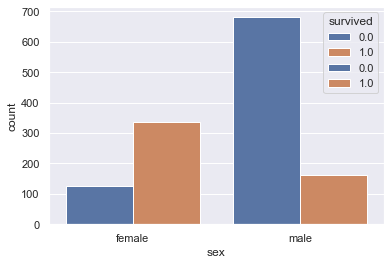

In [30]:
#survived for each gender
for gen in df_clean['sex'].unique():
    gendaer=df_clean[df_clean['sex']==gen]
    survived=gendaer[gendaer['survived']==1]
    prec=(survived.shape[0]/gendaer.shape[0])*100
    print('number of survived', gen ,'=',survived.shape[0],'with percentage ','%.2f'%prec,'% from all', gen)
    sns.countplot('sex',hue='survived',data=df_clean)

number of survived 1.0 = 198 with percentage  61.68 % from all 1.0
number of survived 2.0 = 119 with percentage  42.96 % from all 2.0
number of survived 3.0 = 181 with percentage  25.56 % from all 3.0


C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


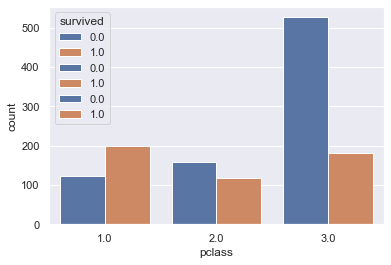

In [31]:
#survived for each class
for clas in df_clean['pclass'].unique():
    gendaer=df_clean[df_clean['pclass']==clas]
    survived=gendaer[gendaer['survived']==1]
    prec=(survived.shape[0]/gendaer.shape[0])*100
    print('number of survived', clas ,'=',survived.shape[0],'with percentage ','%.2f'%prec,'% from all', clas)
    sns.countplot('pclass',hue='survived',data=df_clean)

In [32]:
for col in['sex','embarked']:
    print(col,df_clean[col].unique())

sex ['female' 'male']
embarked ['S' 'C' 'Q']


In [33]:
df_encode=df_clean.replace({
    'sex': {'female':0, 'male':1},
    'embarked':{'S':0,'C':1,'Q':2}
})

In [34]:
df_encode

,pclass,survived,sex,age,sibsp,parch,ticket,fare,embarked,family
0,1.0,1.0,0,29.000000,0.0,0.0,24160,211.3375,0,0.0
1,1.0,1.0,1,0.916700,1.0,2.0,113781,151.5500,0,3.0
2,1.0,0.0,0,2.000000,1.0,2.0,113781,151.5500,0,3.0
3,1.0,0.0,1,30.000000,1.0,2.0,113781,151.5500,0,3.0
4,1.0,0.0,0,25.000000,1.0,2.0,113781,151.5500,0,3.0
...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,0,14.500000,1.0,0.0,2665,14.4542,1,1.0
1305,3.0,0.0,0,29.881135,1.0,0.0,2665,14.4542,1,1.0
1306,3.0,0.0,1,26.500000,0.0,0.0,2656,7.2250,1,0.0
1307,3.0,0.0,1,27.000000,0.0,0.0,2670,7.2250,1,0.0


In [35]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1306 non-null   float64
 1   survived  1306 non-null   float64
 2   sex       1306 non-null   int64  
 3   age       1306 non-null   float64
 4   sibsp     1306 non-null   float64
 5   parch     1306 non-null   float64
 6   ticket    1306 non-null   object 
 7   fare      1306 non-null   float64
 8   embarked  1306 non-null   int64  
 9   family    1306 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 144.5+ KB


In [36]:
df_encode=df_encode.drop(columns='ticket')

In [37]:
input=df_encode.drop(columns='survived')
output=df_encode['survived']

In [38]:
x,x_test,y,y_test=train_test_split(input,output,test_size=0.3,random_state=0)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0)

In [39]:
n_neighbours_values = list(range(1,60))
accuracy_train_values = []
accuracy_val_values = []

for n_neighbours in n_neighbours_values:
    model = KNeighborsClassifier(n_neighbors = n_neighbours)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_val = model.predict(x_val)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_train_values.append( accuracy_train)
    accuracy_val_values.append(accuracy_val)
    
results = pd.DataFrame({
    'n_neighbours': n_neighbours_values,
    'accuracy_train': accuracy_train_values,
    'accuracy_val': accuracy_val_values
})

<AxesSubplot:xlabel='n_neighbours'>

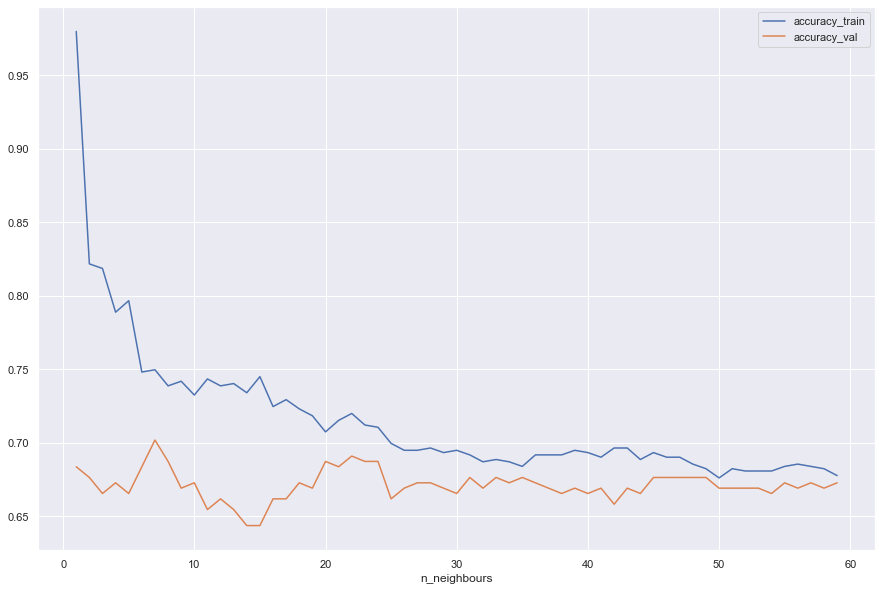

In [40]:
results.plot(x='n_neighbours',y=['accuracy_train','accuracy_val'],figsize=(15,10))

In [44]:
wieght_values=['uniform','distance']
accuracy_train_values = []
accuracy_val_values = []
for i in wieght_values:
    knn=KNeighborsClassifier(n_neighbors=50,weights=i)
    knn.fit(x_train,y_train)
    y_train_pre=knn.predict(x_train)
    y_val_pre=knn.predict(x_val)
    train_accuracy=accuracy_score(y_train,y_train_pre)
    val_accuracy=accuracy_score(y_val,y_val_pre)
    accuracy_train_values.append(train_accuracy)
    accuracy_val_values.append(val_accuracy)
    
results=pd.DataFrame({
        'wieght':wieght_values,
        'train_accuracy':accuracy_train_values,
        'val_accuracy':accuracy_val_values
        
    })

<AxesSubplot:xlabel='wieght'>

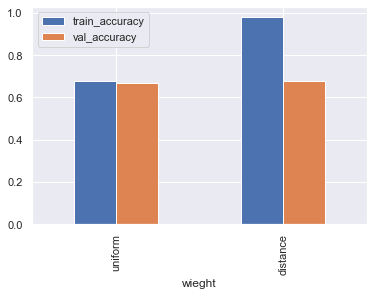

In [46]:
results.plot.bar(x='wieght',y=['train_accuracy','val_accuracy'])

In [61]:
#best knn =20 and weight = uniform
best_model = KNeighborsClassifier(n_neighbors=50, weights='distance')
best_model.fit(x_train, y_train)
y_pred_test = best_model.predict(x_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print(accuracy_test)

0.6887755102040817


In [48]:
#with all X & Y as train
knn=KNeighborsClassifier(n_neighbors=50,weights='distance')
knn.fit(x,y)
y_test_pre=knn.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pre)
test_accuracy

0.6811224489795918

In [49]:
def model(model,x_train,y_train,x_val,y_val):
    model.fit(x_train,y_train)
    y_train_pre=model.predict(x_train)
    y_val_pre=model.predict(x_val)
    train_accuracy= accuracy_score(y_train,y_train_pre)
    val_accuracy=accuracy_score(y_val,y_val_pre)
    return(train_accuracy,val_accuracy)

In [50]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB()
train_accuracy1,val_accuracy1=model(model1,x_train,y_train,x_val,y_val)
print(train_accuracy1)
print(val_accuracy1)

0.7574334898278561
0.7272727272727273


In [51]:
from sklearn.naive_bayes import ComplementNB
model2=ComplementNB()
train_accuracy2,val_accuracy2=model(model2,x_train,y_train,x_val,y_val)
print(train_accuracy2)
print(val_accuracy2)

0.6932707355242567
0.68


In [52]:
from sklearn.naive_bayes import BernoulliNB
model3=BernoulliNB()
train_accuracy3,val_accuracy3=model(model3,x_train,y_train,x_val,y_val)
print(train_accuracy3)
print(val_accuracy3)

0.7668231611893583
0.7745454545454545


In [53]:
from sklearn.naive_bayes import MultinomialNB
model4=MultinomialNB()
train_accuracy4,val_accuracy4=model(model4,x_train,y_train,x_val,y_val)
print(train_accuracy4)
print(val_accuracy4)

0.6932707355242567
0.68


In [55]:
results=pd.DataFrame({
    'model':['GaussianNB','ComplementNB','BernoulliNB','MultinomialNB'],
    'train_accuracy':[train_accuracy1,train_accuracy2,train_accuracy3,train_accuracy4],
    'val_accuracy':[val_accuracy1,val_accuracy2,val_accuracy3,val_accuracy4]
    
})

<AxesSubplot:xlabel='model'>

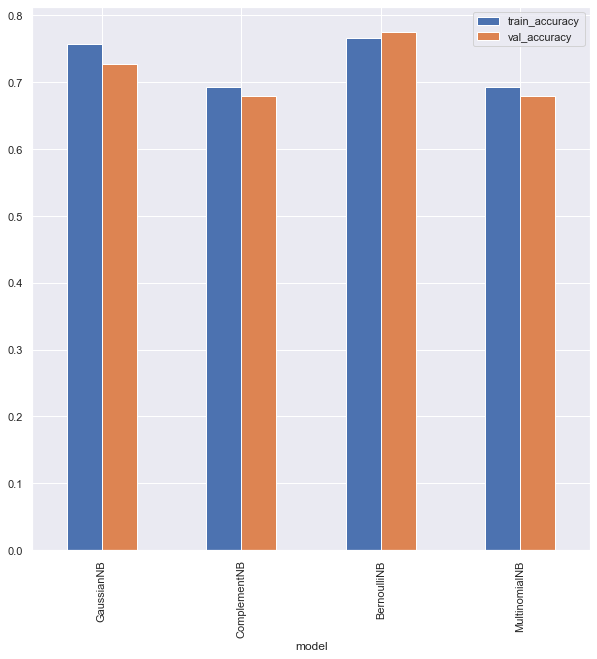

In [56]:
results.plot.bar(x='model',y=['train_accuracy','val_accuracy'],figsize=(10,10))

In [57]:
best=BernoulliNB()
best.fit(x_train,y_train)
y_test_pre=best.predict(x_test)
test_accuracy=accuracy_score(y_test,y_test_pre)
test_accuracy

0.7857142857142857

In [58]:
#logistic regression is most pop with classificatio like survived
log=LogisticRegression()
log.fit(x_train,y_train)
y_train_pre=log.predict(x_train) 
y_val_pre=log.predict(x_val)
train_accuracy= accuracy_score(y_train,y_train_pre)
val_accuracy=accuracy_score(y_val,y_val_pre)
print(train_accuracy)
print(val_accuracy)

0.7949921752738655
0.7781818181818182


C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [59]:
log=LogisticRegression()
log.fit(x_train,y_train)
y_test_pre=log.predict(x_test) 
test_accuracy=accuracy_score(y_test,y_test_pre)
print(test_accuracy)

0.7857142857142857


C:\Users\Omar Y. Sleem\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
